# Data Training

## import libraries

In [122]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

## read data files

In [227]:
#seed for random gen stuff
#can be changed but must be declared here
#as everything that requires a seed will use this

seed = 10

#labeled data

star3642 = pd.read_csv("Star3642_balanced.csv")
star39552 = pd.read_csv("Star39552_balanced.csv")


## relabel spectral classes in labeled data

There's too many subcategories for each spectral type so they will be classified into larger bins (might undo later)

In [228]:
#categories

cat = ['A', 'B', 'C', 'F', 'G', 'K', 'M', 'N', 'O', 'W']
encoder = LabelEncoder()
encoder.fit(cat)

#change categories
for i in cat:
    #labeled
    star3642['SpType'] = star3642['SpType'].apply(str).str.replace("^"+i,i)
    star39552['SpType'] = star39552['SpType'].apply(str).str.replace("^"+i,i)

#Labeling categories

star3642['SpType'] = encoder.transform(star3642['SpType'])
star39552['SpType'] = encoder.transform(star39552['SpType'])

Remove outliers?

In [11]:
numVars = star3642[['Amag','Vmag','Plx','B-V']]

star3642 = star3642[(np.abs(zscore(numVars)) < 3).all(axis=1)]

## START TRAINING !!

### TWO FEATURES: Vmag vs Plx

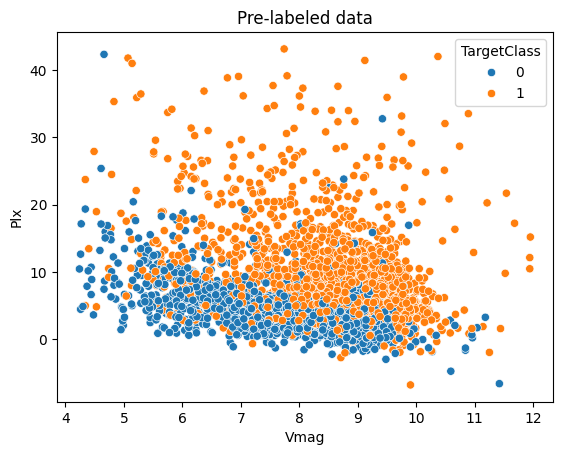

In [12]:
X = star3642[['Vmag', 'Plx']]
y = star3642[['TargetClass']]
xx = star39552[['Vmag', 'Plx']]
yy = star39552[['TargetClass']]

sns.scatterplot(data=X, x=X["Vmag"], y=X["Plx"], hue=y["TargetClass"])
plt.title("Pre-labeled data")
plt.show()

#### K-nearest neighbor

Testing on original data (Star3642)
[[498 137]
 [135 465]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       635
           1       0.77      0.78      0.77       600

    accuracy                           0.78      1235
   macro avg       0.78      0.78      0.78      1235
weighted avg       0.78      0.78      0.78      1235



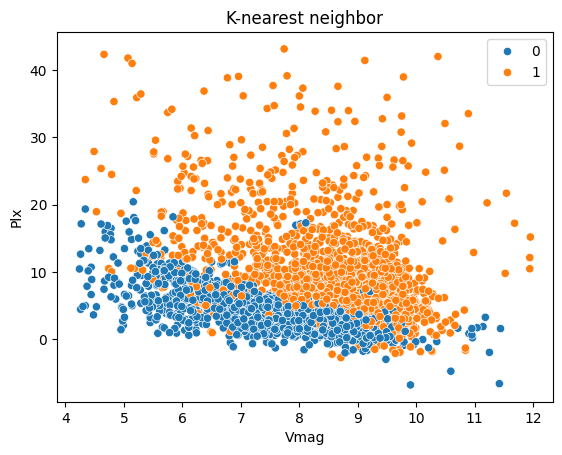

Testing on large labeled data (Star39552)
[[16211  3565]
 [ 6901 12875]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76     19776
           1       0.78      0.65      0.71     19776

    accuracy                           0.74     39552
   macro avg       0.74      0.74      0.73     39552
weighted avg       0.74      0.74      0.73     39552



In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=33)
model = KNeighborsClassifier(n_neighbors=3,leaf_size=23)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("K-nearest neighbor")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

In [76]:
#save model

KPlxVmag = model

#### Decision Tree

Testing on original data (Star3642)
[[787 280]
 [251 799]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1067
           1       0.74      0.76      0.75      1050

    accuracy                           0.75      2117
   macro avg       0.75      0.75      0.75      2117
weighted avg       0.75      0.75      0.75      2117



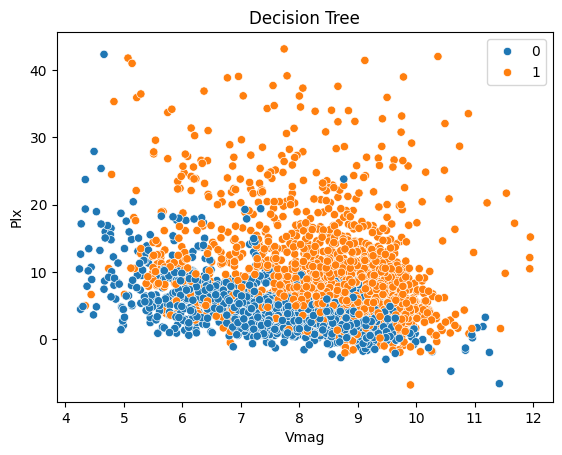

Testing on large labeled data (Star39552)
[[14979  4797]
 [ 7129 12647]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72     19776
           1       0.73      0.64      0.68     19776

    accuracy                           0.70     39552
   macro avg       0.70      0.70      0.70     39552
weighted avg       0.70      0.70      0.70     39552



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Decision Tree")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

In [82]:
#save model

TreePlxVmag = model

#### Random Forest

Testing on original data (Star3642)
[[873 198]
 [223 823]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1071
           1       0.81      0.79      0.80      1046

    accuracy                           0.80      2117
   macro avg       0.80      0.80      0.80      2117
weighted avg       0.80      0.80      0.80      2117



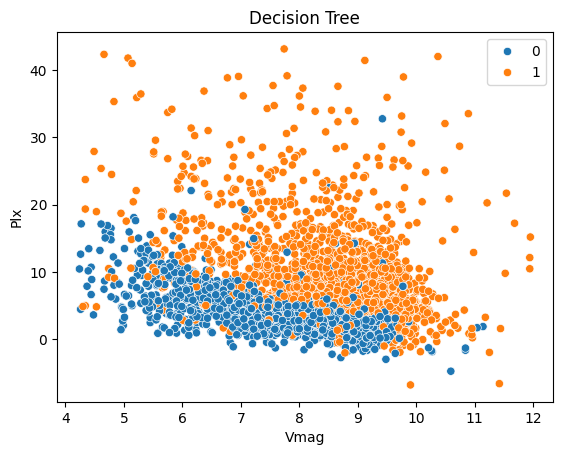

Testing on large labeled data (Star39552)
[[16514  3262]
 [ 6991 12785]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76     19776
           1       0.80      0.65      0.71     19776

    accuracy                           0.74     39552
   macro avg       0.75      0.74      0.74     39552
weighted avg       0.75      0.74      0.74     39552



In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
model = RandomForestClassifier(n_estimators=99,random_state=30)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Decision Tree")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

In [95]:
#save model

RandPlxVmag = model

#### Voting Classifier

Testing on original data (Star3642)
[[618  96]
 [180 517]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       714
           1       0.84      0.74      0.79       697

    accuracy                           0.80      1411
   macro avg       0.81      0.80      0.80      1411
weighted avg       0.81      0.80      0.80      1411



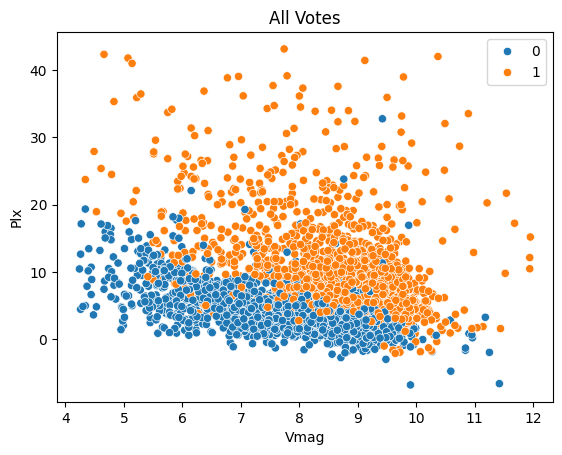

Testing on large labeled data (Star39552)
[[17293  2483]
 [ 7845 11931]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77     19776
           1       0.83      0.60      0.70     19776

    accuracy                           0.74     39552
   macro avg       0.76      0.74      0.73     39552
weighted avg       0.76      0.74      0.73     39552



In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=34)

votePlxVmag = VotingClassifier(estimators=[('K-neighbors',KPlxVmag),('Tree',TreePlxVmag),('RandomForest',RandPlxVmag)])
votePlxVmag.fit(X_train,y_train)

print("Testing on original data (Star3642)")
y_pred = votePlxVmag.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = votePlxVmag.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("All Votes")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = votePlxVmag.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

### THREE FEATURES: SpType & B-V & Plx

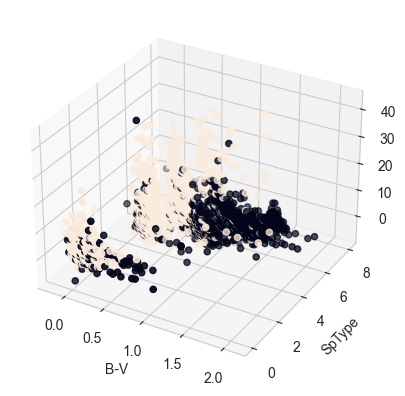

In [133]:
X = star3642[['B-V', 'SpType', 'Plx']]
xx = star39552[['B-V', 'SpType', 'Plx']]
yy = star39552[['TargetClass']]

sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X['B-V']
y = X['SpType']
z = X['Plx']
t = star3642['TargetClass']

ax.set_xlabel("B-V")
ax.set_ylabel("SpType")
ax.set_zlabel("Plx")

ax.scatter(x, y, z, c=t, marker='o')
plt.show()

y = star3642[['TargetClass']]

#### Support Vectors

In [134]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#logistic regression model
model = SVC(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[309  54]
 [ 52 291]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       363
           1       0.84      0.85      0.85       343

    accuracy                           0.85       706
   macro avg       0.85      0.85      0.85       706
weighted avg       0.85      0.85      0.85       706

Testing on large labeled data (Star39552)
[[16036  3740]
 [ 2302 17474]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     19776
           1       0.82      0.88      0.85     19776

    accuracy                           0.85     39552
   macro avg       0.85      0.85      0.85     39552
weighted avg       0.85      0.85      0.85     39552



In [140]:
#save model

Vec3d = model

#### Naive Bayes

In [147]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = GaussianNB()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[308  55]
 [ 51 292]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       363
           1       0.84      0.85      0.85       343

    accuracy                           0.85       706
   macro avg       0.85      0.85      0.85       706
weighted avg       0.85      0.85      0.85       706

Testing on large labeled data (Star39552)
[[15739  4037]
 [ 1814 17962]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.84     19776
           1       0.82      0.91      0.86     19776

    accuracy                           0.85     39552
   macro avg       0.86      0.85      0.85     39552
weighted avg       0.86      0.85      0.85     39552



In [148]:
#save model

Gaus3d = model

#### K-nearest neighbor

In [149]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[313  50]
 [ 60 283]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       363
           1       0.85      0.83      0.84       343

    accuracy                           0.84       706
   macro avg       0.84      0.84      0.84       706
weighted avg       0.84      0.84      0.84       706

Testing on large labeled data (Star39552)
[[16636  3140]
 [ 3294 16482]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     19776
           1       0.84      0.83      0.84     19776

    accuracy                           0.84     39552
   macro avg       0.84      0.84      0.84     39552
weighted avg       0.84      0.84      0.84     39552



In [150]:
#save model

K3d = model

#### SGD Classifier

In [174]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = SGDClassifier(random_state=seed,penalty="l2",loss="huber")
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[312  51]
 [ 48 295]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       363
           1       0.85      0.86      0.86       343

    accuracy                           0.86       706
   macro avg       0.86      0.86      0.86       706
weighted avg       0.86      0.86      0.86       706

Testing on large labeled data (Star39552)
[[15996  3780]
 [ 1758 18018]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     19776
           1       0.83      0.91      0.87     19776

    accuracy                           0.86     39552
   macro avg       0.86      0.86      0.86     39552
weighted avg       0.86      0.86      0.86     39552



In [175]:
#save model

SGD3d = model

#### Gaussian Process

In [177]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = GaussianProcessClassifier(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[310  53]
 [ 55 288]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       363
           1       0.84      0.84      0.84       343

    accuracy                           0.85       706
   macro avg       0.85      0.85      0.85       706
weighted avg       0.85      0.85      0.85       706

Testing on large labeled data (Star39552)
[[16577  3199]
 [ 2694 17082]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     19776
           1       0.84      0.86      0.85     19776

    accuracy                           0.85     39552
   macro avg       0.85      0.85      0.85     39552
weighted avg       0.85      0.85      0.85     39552



In [178]:
#save model

GPC3d = model

#### Decision Tree

In [179]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[306  57]
 [ 57 286]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       363
           1       0.83      0.83      0.83       343

    accuracy                           0.84       706
   macro avg       0.84      0.84      0.84       706
weighted avg       0.84      0.84      0.84       706

Testing on large labeled data (Star39552)
[[15998  3778]
 [ 3605 16171]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     19776
           1       0.81      0.82      0.81     19776

    accuracy                           0.81     39552
   macro avg       0.81      0.81      0.81     39552
weighted avg       0.81      0.81      0.81     39552



In [180]:
#save model

Tree3d = model

#### Random Forest

In [181]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[316  47]
 [ 57 286]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       363
           1       0.86      0.83      0.85       343

    accuracy                           0.85       706
   macro avg       0.85      0.85      0.85       706
weighted avg       0.85      0.85      0.85       706

[[17045  2731]
 [ 3163 16613]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     19776
           1       0.86      0.84      0.85     19776

    accuracy                           0.85     39552
   macro avg       0.85      0.85      0.85     39552
weighted avg       0.85      0.85      0.85     39552



In [182]:
#save model

Random3d = model

#### Voting Classifier

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

vote3d = VotingClassifier(estimators=[('Vector',Vec3d),('Gaus',Gaus3d),('K',K3d),('SGD',SGD3d),('GPC',GPC3d),('Tree',Tree3d),('Random',Random3d)])
vote3d.fit(X_train,y_train)

print("Testing on original data (Star3642)")
y_pred = vote3d.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = vote3d.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[317  46]
 [ 54 289]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       363
           1       0.86      0.84      0.85       343

    accuracy                           0.86       706
   macro avg       0.86      0.86      0.86       706
weighted avg       0.86      0.86      0.86       706

Testing on large labeled data (Star39552)
[[16752  3024]
 [ 2548 17228]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     19776
           1       0.85      0.87      0.86     19776

    accuracy                           0.86     39552
   macro avg       0.86      0.86      0.86     39552
weighted avg       0.86      0.86      0.86     39552



*Increased accuracy from an average of 0.85 to 0.86 with voting classifier.*

#### FOUR FEATURES: Plx & Vmag & SpType & B-V

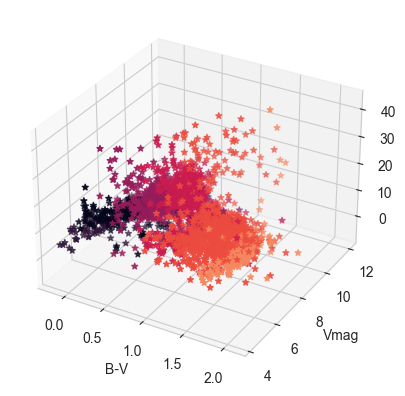

In [192]:
X = star3642[['B-V', 'SpType', 'Plx', 'Vmag']]
xx = star39552[['B-V', 'SpType', 'Plx', 'Vmag']]
yy = star39552[['TargetClass']]

sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X['B-V']
y = X['Vmag']
z = X['Plx']
d = X['SpType']

ax.set_xlabel("B-V")
ax.set_ylabel("Vmag")
ax.set_zlabel("Plx")

ax.scatter(x, y, z, c=d,marker="*")
plt.show()

y = star3642[['TargetClass']]

#### Support Vector

In [193]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = SVC(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[324  39]
 [ 47 296]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       363
           1       0.88      0.86      0.87       343

    accuracy                           0.88       706
   macro avg       0.88      0.88      0.88       706
weighted avg       0.88      0.88      0.88       706

Testing on large labeled data (Star39552)
[[17355  2421]
 [ 2852 16924]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     19776
           1       0.87      0.86      0.87     19776

    accuracy                           0.87     39552
   macro avg       0.87      0.87      0.87     39552
weighted avg       0.87      0.87      0.87     39552



In [194]:
#save model

Vec4d = model

#### Naive Bayes

In [195]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = GaussianNB()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[310  53]
 [ 47 296]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       363
           1       0.85      0.86      0.86       343

    accuracy                           0.86       706
   macro avg       0.86      0.86      0.86       706
weighted avg       0.86      0.86      0.86       706

Testing on large labeled data (Star39552)
[[15954  3822]
 [ 1586 18190]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     19776
           1       0.83      0.92      0.87     19776

    accuracy                           0.86     39552
   macro avg       0.87      0.86      0.86     39552
weighted avg       0.87      0.86      0.86     39552



In [196]:
#save model

Gaus4d = model

#### K-Nearest Neighbor

In [197]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[323  40]
 [ 56 287]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       363
           1       0.88      0.84      0.86       343

    accuracy                           0.86       706
   macro avg       0.86      0.86      0.86       706
weighted avg       0.86      0.86      0.86       706

Testing on large labeled data (Star39552)
[[17270  2506]
 [ 3112 16664]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     19776
           1       0.87      0.84      0.86     19776

    accuracy                           0.86     39552
   macro avg       0.86      0.86      0.86     39552
weighted avg       0.86      0.86      0.86     39552



In [198]:
#save model

K4d = model

#### SGD Classifier

In [208]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = SGDClassifier(random_state=seed,penalty="l2",loss="log_loss")
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[324  39]
 [ 41 302]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       363
           1       0.89      0.88      0.88       343

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706

Testing on large labeled data (Star39552)
[[16938  2838]
 [ 2573 17203]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     19776
           1       0.86      0.87      0.86     19776

    accuracy                           0.86     39552
   macro avg       0.86      0.86      0.86     39552
weighted avg       0.86      0.86      0.86     39552



In [209]:
#save model

SGD4d = model

#### Gaussian Process

In [210]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = GaussianProcessClassifier(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[326  37]
 [ 53 290]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       363
           1       0.89      0.85      0.87       343

    accuracy                           0.87       706
   macro avg       0.87      0.87      0.87       706
weighted avg       0.87      0.87      0.87       706

Testing on large labeled data (Star39552)
[[17431  2345]
 [ 2954 16822]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     19776
           1       0.88      0.85      0.86     19776

    accuracy                           0.87     39552
   macro avg       0.87      0.87      0.87     39552
weighted avg       0.87      0.87      0.87     39552



In [216]:
#save model

GPC4d = model

#### Decision Tree

In [212]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[298  65]
 [ 54 289]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       363
           1       0.82      0.84      0.83       343

    accuracy                           0.83       706
   macro avg       0.83      0.83      0.83       706
weighted avg       0.83      0.83      0.83       706

Testing on large labeled data (Star39552)
[[16173  3603]
 [ 3074 16702]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     19776
           1       0.82      0.84      0.83     19776

    accuracy                           0.83     39552
   macro avg       0.83      0.83      0.83     39552
weighted avg       0.83      0.83      0.83     39552



In [213]:
#save model

Tree4d = model

#### Random Forest

In [214]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[327  36]
 [ 52 291]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       363
           1       0.89      0.85      0.87       343

    accuracy                           0.88       706
   macro avg       0.88      0.87      0.88       706
weighted avg       0.88      0.88      0.88       706

[[17398  2378]
 [ 2509 17267]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     19776
           1       0.88      0.87      0.88     19776

    accuracy                           0.88     39552
   macro avg       0.88      0.88      0.88     39552
weighted avg       0.88      0.88      0.88     39552



In [215]:
#save model

Random4d = model

#### Voting Classifier

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

vote3d = VotingClassifier(estimators=[('Vector',Vec4d),('GPC',GPC4d),('Random',Random4d)])
vote3d.fit(X_train,y_train)

print("Testing on original data (Star3642)")
y_pred = vote3d.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = vote3d.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[326  37]
 [ 49 294]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       363
           1       0.89      0.86      0.87       343

    accuracy                           0.88       706
   macro avg       0.88      0.88      0.88       706
weighted avg       0.88      0.88      0.88       706

Testing on large labeled data (Star39552)
[[17441  2335]
 [ 2489 17287]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     19776
           1       0.88      0.87      0.88     19776

    accuracy                           0.88     39552
   macro avg       0.88      0.88      0.88     39552
weighted avg       0.88      0.88      0.88     39552



*Increases average accuracy from 0.87 to 0.88*

## Training summary

The most efficient model regarding the time it takes to predict and accuracy is the voting classifier of 4 dimensions, where the models are vector, GPC and random forest. In summary, including every relevant parameter from the original dataset to predict the target class is optimal, as all are relevant besides the error of Plx and Amag as it is calculated using 2 of the other parameters. The theory to test now is if Plx and Vmag can be replaced by just Amag in the model to utilize one that only needs 3 parameters. (Amag, B-V, SpType)

## Replacing Plx & Vmag with Amag

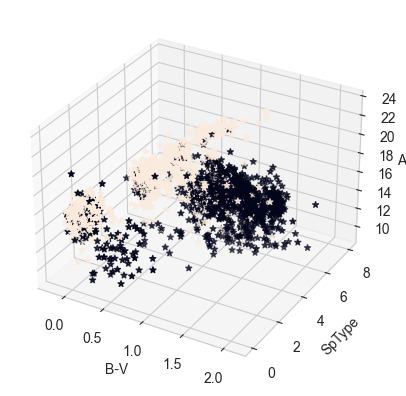

In [218]:
X = star3642[['B-V', 'SpType', 'Amag']]
xx = star39552[['B-V', 'SpType', 'Amag']]
yy = star39552[['TargetClass']]

sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X['B-V']
y = X['SpType']
z = X['Amag']
t = star3642['TargetClass']

ax.set_xlabel("B-V")
ax.set_ylabel("SpType")
ax.set_zlabel("Amag")

ax.scatter(x, y, z, c=t, marker='*')
plt.show()

y = star3642[['TargetClass']]

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


model = SVC(random_state=seed)
model.fit(X_train, y_train)

print("SVC (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("SVC (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

SVCa = model

model = GaussianNB()
model.fit(X_train, y_train)

print("Bayes (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Bayes (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Gausa = model

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print("K (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("K (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Ka = model

model = SGDClassifier(random_state=seed,penalty="l2",loss="log_loss")
model.fit(X_train, y_train)

print("SGD (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("SGD (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

SGDa = model

model = GaussianProcessClassifier(random_state=seed)
model.fit(X_train, y_train)

print("GPC (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("GPC (Star39552)")
y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

GPCa = model

print("Tree (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Tree (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Treea = model

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Randoma = model

SVC (Star3642)
[[323  40]
 [ 45 298]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       363
           1       0.88      0.87      0.88       343

    accuracy                           0.88       706
   macro avg       0.88      0.88      0.88       706
weighted avg       0.88      0.88      0.88       706

SVC (Star39552)
[[17263  2513]
 [ 2459 17317]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     19776
           1       0.87      0.88      0.87     19776

    accuracy                           0.87     39552
   macro avg       0.87      0.87      0.87     39552
weighted avg       0.87      0.87      0.87     39552

Bayes (Star3642)
[[318  45]
 [ 38 305]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       363
           1       0.87      0.89      0.88       343

    accuracy                           0.88       706
   

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)
votea = VotingClassifier(estimators=[('Gaus',Gausa),('GPC',GPCa),('Tree',Treea)])
votea.fit(X_train,y_train)

print("Testing on original data (Star3642)")
y_pred = votea.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Testing on large labeled data (Star39552)")

y_pred = votea.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

Testing on original data (Star3642)
[[248  28]
 [ 31 223]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       276
           1       0.89      0.88      0.88       254

    accuracy                           0.89       530
   macro avg       0.89      0.89      0.89       530
weighted avg       0.89      0.89      0.89       530

Testing on large labeled data (Star39552)
[[17518  2258]
 [ 2946 16830]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     19776
           1       0.88      0.85      0.87     19776

    accuracy                           0.87     39552
   macro avg       0.87      0.87      0.87     39552
weighted avg       0.87      0.87      0.87     39552



*On average, the accuracy evens out to the same 0.88 between both. This one is more efficient as it only requires 3 features. This model will be used to proceed with the following step. This will be available on another file. Model is saved for future use.*

In [226]:
import pickle
import joblib

#saved in both forms to be sure
with open('modelPICKLE.pkl','wb') as f:
    pickle.dump(votea,f)
joblib.dump(votea, "modelJOBLIB.pkl") 

['modelJOBLIB.pkl']